(-10.0, 10.0)

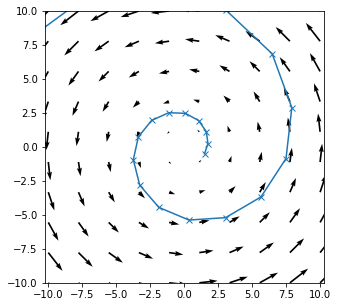

In [41]:
# import numpy as np
import matplotlib.pyplot as plt

def flow(x, y):
    return np.array([-y, x])

def plot_flow():
    x_range = np.linspace(-10,10,10)
    y_range = np.linspace(-10,10,10)
    x_grid, y_grid = np.meshgrid(x_range,y_range)
    plt.figure(figsize=(5,5))
    plt.quiver(x_grid, y_grid, *flow(x_grid, y_grid))
    plt.axis("equal")
    
    
state = np.array([1,-1])
state_history = []
dt = 0.5
for i in range(50):
    state = state + dt*flow(state[0], state[1])
    state_history.append(state)
state_history = np.asarray(state_history)
plot_flow()
plt.plot(state_history[:,0],state_history[:,1] ,'x-')
plt.xlim(-10,10)
plt.ylim(-10,10)

In [38]:
state_history

array([[ 1.20000000e+00, -9.00000000e-01],
       [ 1.38000000e+00, -7.90455488e-01],
       [ 1.53809110e+00, -6.72982087e-01],
       [ 1.67268752e+00, -5.48962287e-01],
       [ 1.78247997e+00, -4.19629865e-01],
       [ 1.86640595e+00, -2.86120316e-01],
       [ 1.92363001e+00, -1.49503848e-01],
       [ 1.95353078e+00, -1.08088583e-02],
       [ 1.95569255e+00,  1.28959907e-01],
       [ 1.92990057e+00,  2.68805985e-01],
       [ 1.87613937e+00,  4.07726846e-01],
       [ 1.79459400e+00,  5.44699083e-01],
       [ 1.68565419e+00,  6.78661541e-01],
       [ 1.54992188e+00,  8.08494286e-01],
       [ 1.38822302e+00,  9.32990145e-01],
       [ 1.20162499e+00,  1.05081302e+00],
       [ 9.91462387e-01,  1.16043168e+00],
       [ 7.59376051e-01,  1.26000388e+00],
       [ 5.07375275e-01,  1.34714607e+00],
       [ 2.37946061e-01,  1.41837635e+00],
       [-4.57292082e-02,  1.46715606e+00],
       [-3.39160421e-01,  1.48854045e+00],
       [-6.36868511e-01,  1.54677793e+00],
       [-9.